# Системы компьютерной математики. Cамойлюк А.А. 381908-1. Вариант 5.

# 5. Интерполяция и численное интегрирование. Формула ошибок

Построить $11$ точек, взяв
$$
x_i = \frac{i-1}{10}, \quad y_i = {\rm erf} x_i\quad (i=1,\dots,11),
$$
где
$$
{\rm erf} x = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt
$$
– *функция ошибок*.

* Составить систему линейных уравнений для нахождения
коэффициентов интерполирующего многочлена $10$-ой степени. Найти
число обусловленности этой системы. Решить составленную систему. С помощью построенного
интерполянта протабулировать значение функции в промежуточных точках.
* Сравнить коэффициенты построенного интерполирующего многочлена
с коэффициентами многочлена, который можно получить с помощью функции
`numpy.polyfit`.
* Постройть кубический эрмитов интерполянт и кубический сплайн. Найти значения интерполянтов в тех же точках, что и в предыдущих
пунктах и сравнить результаты.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg
from scipy import interpolate
from scipy import special

In [2]:
x=[0]*11
for i in range(len(x)):
    x[i]=((i-1)/10)
x

[-0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [3]:
y=special.erf(x)
y

array([-0.11246292,  0.        ,  0.11246292,  0.22270259,  0.32862676,
        0.42839236,  0.52049988,  0.60385609,  0.67780119,  0.74210096,
        0.79690821])

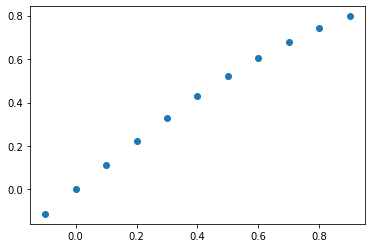

In [4]:
plt.plot(x, y, 'o')
pass

Система линейных уравнений для нахождения коэффициентов интерполирующего многочлена $10$-ой степени имеет следующий вид:
$$
\left\{
\begin{array}{l}
a_0 x_0^{10} + a_1 x_0^9 + \dots + a_9 x_0 + a_{10} = y_0, \\
a_0 x_1^{10}+ a_1 x_1^9 + \dots + a_9 x_1 + a_{10} = y_1, \\
\dots \\
a_0 x_{10}^{10} + a_1 x_{10}^9 + \dots + a_9 x_{10} + a_{10} = y_{10} \\
\end{array}
\right.
$$
Вид матрицы этой системы:
$$
W = 
\left(
\begin{array}{ccccc}
    x_0^{10} &     x_0^9 & \dots &    x_0  & 1 \\
    x_1^{10} &     x_1^9 & \dots &    x_1  & 1 \\
\dots \\
    x_{10}^{10} &     x_{10}^9 & \dots &    x_{10}  & 1 \\
\end{array}
\right).
$$
Если ввести также векторы
$$
a = 
\left(
\begin{array}{c}
    a_0     \\
    a_1     \\
    \vdots  \\
    a_{10}     \\
\end{array}
\right),
\qquad
y =
\left(
\begin{array}{c}
    y_0     \\
    y_1     \\
   \vdots   \\
    y_{10}     \\
\end{array}
\right),
$$
то система принимает вид $Wa = y$.

Получим матрицу Вандермонда с помощью функции `np.vander(x)`:

In [5]:
W = np.vander(x)
W

array([[ 1.00000000e-10, -1.00000000e-09,  1.00000000e-08,
        -1.00000000e-07,  1.00000000e-06, -1.00000000e-05,
         1.00000000e-04, -1.00000000e-03,  1.00000000e-02,
        -1.00000000e-01,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 1.00000000e-10,  1.00000000e-09,  1.00000000e-08,
         1.00000000e-07,  1.00000000e-06,  1.00000000e-05,
         1.00000000e-04,  1.00000000e-03,  1.00000000e-02,
         1.00000000e-01,  1.00000000e+00],
       [ 1.02400000e-07,  5.12000000e-07,  2.56000000e-06,
         1.28000000e-05,  6.40000000e-05,  3.20000000e-04,
         1.60000000e-03,  8.00000000e-03,  4.00000000e-02,
         2.00000000e-01,  1.00000000e+00],
       [ 5.90490000e-06,  1.96830000e-05,  6.56100000e-05,
         2.18700000e-04,  7.29000000e-04,  2.43000000e-03,
  

In [6]:
np.linalg.cond(W) # Число обусловленности системы

48418951.18885507

Данная матрица - матрица с большим числом обусловленности, значит она является плохо обусловленной матрицей. При численном решении систем с плохо обусловленными матрицами возможно сильное накопление погрешностей.

Построим график зависимости чисел обусловленности от степени интерполяционного многочлена:

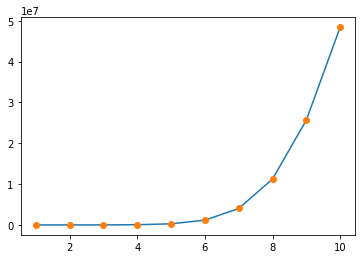

In [7]:
n = np.arange(1, 11, 1)
cnd=[0]*10
for i in range(len(cnd)):
    cnd[i]=np.linalg.cond(W[9-i:,9-i:])
plt.plot(n, cnd, color = 'tab:blue')
plt.plot(n, cnd, 'o', color = 'tab:orange')

По графику видно, что чем больше степень интерполяционного многочлена, тем больше число обусловленности.

Найдем коэффициенты интерполяционного многочлена, решая систему линейных уравнений:

In [8]:
# коэффициенты интерполяционного многочлена с помощью матрицы 
linalg.solve(W,y)

array([-1.81541515e-03,  6.99182423e-03, -9.06336540e-04, -2.66590511e-02,
        1.42861460e-05,  1.12819182e-01,  3.51775666e-06, -3.76126475e-01,
       -3.56816904e-08,  1.12837917e+00,  0.00000000e+00])

Полученное решение нельзя считать полностью достоверным, так как матрица этой системы плохо обусловленная.

Выполним проверку, умножим матрицу коэфициентов на полученный столбец решений. Данное произведение должно оказаться равно столбцу y: 

In [9]:
a = linalg.solve(W,y)
y1 = np.dot(a, W)
print(y)
print(y1)

[-0.11246292  0.          0.11246292  0.22270259  0.32862676  0.42839236
  0.52049988  0.60385609  0.67780119  0.74210096  0.79690821]
[0.11889633 0.14768757 0.18306701 0.22629366 0.27870973 0.34164658
 0.41628369 0.50349569 0.60371677 0.71692024 0.84270067]


По результату проверки видно, что полученное произведение отличается от столбца y.

In [10]:
# коэффициенты интерполяционного многочлена с помощью функции f = np.polyfit(x, y, n) :
f = np.polyfit(x, y, 10)
f

array([-1.81541510e-03,  6.99182405e-03, -9.06336257e-04, -2.66590513e-02,
        1.42862595e-05,  1.12819182e-01,  3.51776006e-06, -3.76126475e-01,
       -3.56817325e-08,  1.12837917e+00, -1.42266556e-16])

Значения первых 10 коэффициентов практически совпадают, разница заключается в последних коэффициентах.

In [11]:
# значение интерполяционного многочлена в промежуточных точках
np.polyval(f, [0.125, 0.275, 0.35, 0.425, 0.537])

array([0.1403162 , 0.30265634, 0.37938205, 0.45218716, 0.55240623])

In [12]:
# абсолютная ошибка
np.polyval(f, 0.5) - special.erf(0.5)

-3.3306690738754696e-16

In [13]:
x_array = np.arange(-0.1, 0.9, 0.01)
np.linalg.norm(np.polyval(f, x_array) - special.erf(x_array), np.Inf)

1.2168347440777438e-09

In [14]:
# относительная ошибка
x_array = np.arange(-0.1, 0.9, 0.01)
np.linalg.norm((np.polyval(f, x_array) - special.erf(x_array))/special.erf(x_array), np.Inf)

2.271263513326913

[0.14031585 0.30265592 0.37938101 0.45218653 0.55240508]


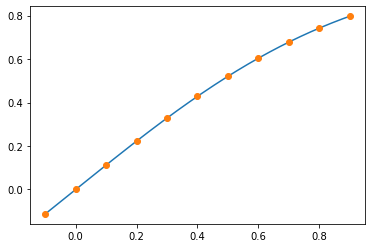

In [15]:
#Кубический сплайн
spline = interpolate.interp1d(x, y, kind = 'cubic')
x_ar = [0.125, 0.275, 0.35, 0.425, 0.537]
print(spline(x_ar)) 
xx = np.linspace(np.min(x), np.max(x), 500)
plt.plot(xx, spline(xx), color = 'tab:blue')
plt.plot(x, y, 'o', color = 'tab:orange')
pass

[0.14028076 0.30269083 0.37938068 0.45215154 0.55238233]


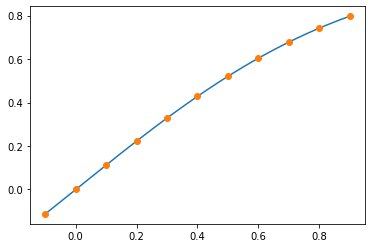

In [16]:
# Кубический эрмитов интерполянт
pchip = interpolate.pchip(x, y)
print(pchip(x_ar))
plt.plot(xx, pchip(xx),   color = 'tab:blue')
plt.plot(x, y, 'o', color = 'tab:orange')
pass

Значения интерполянтов в промежуточных точках практически совпадают.